# Profile Saya

Nama = Wahyu Budi Utomo
Username = AMBISIUS
Email = wahyu.budi.w.b33@gmail.com
Nomor telepon = +6285259203530

# Dataset

## Mengakses Dataset

In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-09-02 17:23:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.59MB/s    in 61s     

2020-09-02 17:24:58 (5.03 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



## Mengekstrak Dataset

In [2]:
import zipfile, os

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Mendefinisikan Nama Direktori Folder Batu, Gunting, Kertas

In [3]:
import os
gunting_dir = os.path.join('/content/rockpaperscissors/scissors')
batu_dir= os.path.join('/content/rockpaperscissors/rock')
kertas_dir = os.path.join('/content/rockpaperscissors/paper')

## Menentukan Jumlah Sample Yang Ada di Masing-Masing Folder

In [4]:
print('Jumlah gambar gunting pada folder scissors:', len(os.listdir(gunting_dir)))
print('Jumlah gambar batu pada folder rock:', len(os.listdir(batu_dir)))
print('Jumlah gambar kertas pada folder paper', len(os.listdir(kertas_dir)))

Jumlah gambar gunting pada folder scissors: 750
Jumlah gambar batu pada folder rock: 726
Jumlah gambar kertas pada folder paper 712


## Mengambil 3 Buah Sample File Dari Attribut Yang Ada Pada Folder

In [5]:
file_gunting = os.listdir(gunting_dir)
print("Gunting:",file_gunting[:3])

file_batu = os.listdir(batu_dir)
print("Batu:",file_batu[:3])

file_kertas = os.listdir(kertas_dir)
print("Kertas:",file_kertas[:3])

Gunting: ['hP1nFePk6ao9xKDF.png', 'd9N9D5ldS6PCfFXu.png', 'lPWbZ5JDB0gjIv2J.png']
Batu: ['2O9XPBJRT119drWX.png', 'Hz5ynYPew6XqaLdO.png', 'n3ryKsLTPcGhpW6S.png']
Kertas: ['wdUfwC8IoQbVtqzR.png', 'Qxx5l8WCNBjMb5xI.png', 'fSWSXO9fumLluiAF.png']


# ImageDataGenerator

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi Gambar

In [8]:
base_dir = '/content/rockpaperscissors/rps-cv-images/'
training_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    # MEMECAH MENJADI DATA TRAIN DAN VALIDATION
    validation_split=0.4
)

## Pelabelan Data Menggunakan Image Data Generator Berdasarkan Folder

In [9]:
train_generator = training_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Membuat Model Jaringan Saraf Tiruan Dengan Callback

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\n\nPelatihan sukses, akurasi validasi sudah lebih dari 90%")
      self.model.stop_training=True

callbacks = myCallback()

In [11]:
model = tf.keras.models.Sequential([
                                    # Layer Input serta konvolusi pertama
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    # Konvolusi kedua
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    # Konvolusi ketiga
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    # Mengubah gambar yang merupakan matriks 2 dimensi menjadi larik 1 dimensi
                                    tf.keras.layers.Flatten(),
                                    # Hiden layers pertama
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    # Hiden layer kedua
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    # Layer output
                                    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

## Proses Compile Pada Model

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', #saya menggunakan optimizer yang tidak diajarkan di kelas
              metrics=['accuracy'])

## Melatih Model Jaringan Saraf Tiruan

In [13]:
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/100
4/4 - 5s - loss: 1.1901 - accuracy: 0.3438 - val_loss: 1.0911 - val_accuracy: 0.4219
Epoch 2/100
4/4 - 4s - loss: 1.1103 - accuracy: 0.3516 - val_loss: 1.0983 - val_accuracy: 0.4062
Epoch 3/100
4/4 - 4s - loss: 1.0981 - accuracy: 0.3594 - val_loss: 1.1052 - val_accuracy: 0.3203
Epoch 4/100
4/4 - 4s - loss: 1.1080 - accuracy: 0.2812 - val_loss: 1.0977 - val_accuracy: 0.3516
Epoch 5/100
4/4 - 4s - loss: 1.0894 - accuracy: 0.4219 - val_loss: 1.0946 - val_accuracy: 0.3359
Epoch 6/100
4/4 - 4s - loss: 1.0771 - accuracy: 0.3359 - val_loss: 1.1588 - val_accuracy: 0.2969
Epoch 7/100
4/4 - 4s - loss: 1.1570 - accuracy: 0.2857 - val_loss: 1.0864 - val_accuracy: 0.3594
Epoch 8/100
4/4 - 4s - loss: 1.0963 - accuracy: 0.2891 - val_loss: 1.0917 - val_accuracy: 0.3359
Epoch 9/100
4/4 - 4s - loss: 1.0879 - accuracy: 0.3906 - val_loss: 1.0791 - val_accuracy: 0.4375
Epoch 10/100
4/4 - 4s - loss: 1.1081 - accuracy: 0.3203 - val_loss: 1.0734 - val_accuracy: 0.3281
Epoch 11/100
4/4 - 4s - loss:

## Visualisasi Plot Akurasi Dan Loss

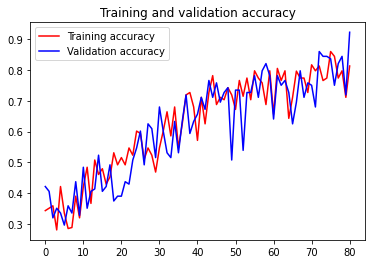

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

# Tahap Uji Coba

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
Ini adalah Batu


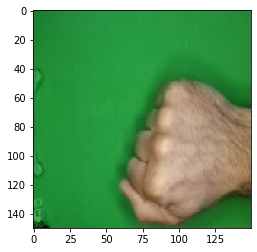

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Ini adalah Kertas')
  elif classes[0][1]==1:
    print('Ini adalah Batu')
  elif classes[0][2]==1:
    print('Ini adalah Gunting')
  else:
    print('Tidak Diketahui')